# Analysis and Visualization of Complex Agro-Environmental Data
---
## Descriptive statistics

As an example we will work on a subset of a database that resulted from integrating information from several river fish biomonitoring programmes accross Europe. This subset includes data for some Mediterranean countries. Each case (rows) corresponds to a fish sampling point. Variables (columns) includes coordinates, country and catchment identifiers, local scale environmental variables, climatic variables, human pressures and fish presence/absence data.

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using tables, histograms, box plots, and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

We will be going over how to perform some basic visualisations in Python, and, most importantly, we will learn how to begin exploring data from a graphical perspective.

In [1]:
import pandas as pd
import zipfile
# import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
import numpy as np

In [ ]:
sns.__version__

'0.13.2'

#### Import, visualize and summarize table properties

In [4]:
df = pd.read_csv('../../examples/EFIplus_medit.zip',compression='zip', sep=";")

In [5]:
print(df)

       Site_code   Latitude  Longitude   Country Catchment_name  Galiza  \
0     ES_01_0002  38.102003  -4.096070     Spain   Guadalquivir       0   
1     ES_02_0001  40.530188  -1.887796     Spain           Tejo       0   
2     ES_02_0002  40.595432  -1.928079     Spain           Tejo       0   
3     ES_02_0003  40.656184  -1.989831     Spain           Tejo       0   
4     ES_02_0004  40.676402  -2.036274     Spain           Tejo       0   
...          ...        ...        ...       ...            ...     ...   
5006      PTVO60  40.641612  -8.325149  Portugal          Vouga       0   
5007      PTVO61  40.729015  -8.098851  Portugal          Vouga       0   
5008      PTVO62  40.727959  -8.107344  Portugal          Vouga       0   
5009      PTVO63  40.817783  -8.224903  Portugal          Vouga       0   
5010      PTVO64  40.794352  -8.255380  Portugal          Vouga       0   

      Subsample  Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  \
0             1              

In [ ]:
df.head(10)

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,ES_02_0005,40.732830,-2.078003,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,ES_02_0006,40.788013,-2.152441,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
7,ES_02_0007,40.793682,-2.285236,Spain,Tejo,0,1,1,1,0,...,0,1,0,0,0,0,1,0,0,0
8,ES_02_0008,40.747652,-2.394504,Spain,Tejo,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,ES_02_0010,40.807161,-1.838133,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 6.3+ MB


In [ ]:
list(df.columns)

['Site_code',
 'Latitude',
 'Longitude',
 'Country',
 'Catchment_name',
 'Galiza',
 'Subsample',
 'Calib_EFI_Medit',
 'Calib_connect',
 'Calib_hydrol',
 'Calib_morphol',
 'Calib_wqual',
 'Geomorph1',
 'Geomorph2',
 'Geomorph3',
 'Water_source_type',
 'Flow_regime',
 'Altitude',
 'Geological_typology',
 'Actual_river_slope',
 'Natural_sediment',
 'Elevation_mean_catch',
 'prec_ann_catch',
 'temp_ann',
 'temp_jan',
 'temp_jul',
 'Barriers_catchment_down',
 'Barriers_river_segment_up',
 'Barriers_river_segment_down',
 'Barriers_number_river_segment_up',
 'Barriers_number_river_segment_down',
 'Barriers_distance_river_segment_up',
 'Barriers_distance_river_segment_down',
 'Impoundment',
 'Hydropeaking',
 'Water_abstraction',
 'Hydro_mod',
 'Temperature_impact',
 'Velocity_increase',
 'Reservoir_flushing',
 'Sedimentation',
 'Channelisation',
 'Cross_sec',
 'Instream_habitat',
 'Riparian_vegetation',
 'Embankment',
 'Floodprotection',
 'Floodplain',
 'Toxic_substances',
 'Acidification',
 '

#### Clean and reajust the dataset

In [ ]:
# clean up the dataset to remove unnecessary columns (eg. REG)
df.drop(df.iloc[:,5:15], axis=1, inplace=True) # axis=1 - columns; inplace=True - the changes will be saved to the original data frame.

# let's rename some columns so that they make sense
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True) # inplace="True" means that df will be updated

# for consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

In [ ]:
# Check data types
pd.options.display.max_rows = 154 # maximum number of rows displayed.
df.dtypes

Site_code                                object
Latitude                                float64
Longitude                               float64
Country                                  object
Catchment_name                           object
Water_source_type                        object
Flow_regime                              object
Altitude                                  int64
Geological_typology                      object
Actual_river_slope                      float64
Natural_sediment                        float64
Elevation_mean_catch                    float64
prec_ann_catch                          float64
temp_ann                                float64
temp_jan                                float64
temp_jul                                float64
Barriers_catchment_down                   int64
Barriers_river_segment_up               float64
Barriers_river_segment_down             float64
Barriers_number_river_segment_up        float64
Barriers_number_river_segment_down      

In [ ]:
# Number of values per variable
df.count()

Site_code                               5011
Latitude                                5011
Longitude                               5011
Country                                 5011
Catchment_name                          5011
Water_source_type                       4712
Flow_regime                             4473
Altitude                                5011
Geological_typology                     5011
Actual_river_slope                      4975
Natural_sediment                        4402
Elevation_mean_catch                    4841
prec_ann_catch                          4841
temp_ann                                4841
temp_jan                                4841
temp_jul                                4841
Barriers_catchment_down                 5011
Barriers_river_segment_up               5009
Barriers_river_segment_down             5009
Barriers_number_river_segment_up        5008
Barriers_number_river_segment_down      5009
Barriers_distance_river_segment_up      4998
Barriers_d

### Handling missing data

In [ ]:
# Number of missing values (NaN) per variable
df.isnull().sum()

Site_code                                  0
Latitude                                   0
Longitude                                  0
Country                                    0
Catchment_name                             0
Water_source_type                        299
Flow_regime                              538
Altitude                                   0
Geological_typology                        0
Actual_river_slope                        36
Natural_sediment                         609
Elevation_mean_catch                     170
prec_ann_catch                           170
temp_ann                                 170
temp_jan                                 170
temp_jul                                 170
Barriers_catchment_down                    0
Barriers_river_segment_up                  2
Barriers_river_segment_down                2
Barriers_number_river_segment_up           3
Barriers_number_river_segment_down         2
Barriers_distance_river_segment_up        13
Barriers_d

In [21]:
#df2 = df.dropna(how='all') # drops rows when all elements are missing values
#df2.info()

#df2 = df.dropna(how='all', axis=1) # drops columns when at least one element is a missing value
#df2.info()

df2 = df.dropna() # drops rows when at least one element is a missing value
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2822 entries, 18 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 3.6+ MB


### Numerical summaries

In [ ]:
# mean and median (rounded to 2 decimal cases)
mean = round(df['prec_ann_catch'].mean(), 2)
median = round(df['prec_ann_catch'].median(), 2)
print(mean, median)

941.82 968.9


In [ ]:
# the catchment with more data
print(df['Catchment_name'].mode())

0    Ebro
Name: Catchment_name, dtype: object


In [ ]:
# A fast way of getting a summary statistics of quantitative data (int or float)
round(df.describe() ,2) # before dropping NaNs (rounded to 2 decimal cases)

,Latitude,Longitude,Altitude,Actual_river_slope,Natural_sediment,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
count,5011.00,5011.00,5011.00,4975.00,4402.00,4841.00,4841.00,4841.00,4841.00,4841.00,...,5011.00,5011.00,5011.00,5011.00,5011.00,5011.00,5011.0,5011.00,5011.00,5011.00
mean,41.66,-4.22,428.07,14.58,3.06,785.18,941.82,13.26,6.21,20.60,...,0.00,0.09,0.00,0.00,0.01,0.00,0.2,0.07,0.13,0.03
std,1.65,4.75,342.91,22.60,0.57,432.73,292.50,2.17,2.66,2.58,...,0.02,0.28,0.02,0.02,0.11,0.01,0.4,0.25,0.34,0.17
min,36.21,-9.46,0.00,0.00,1.00,52.25,373.37,3.90,-2.70,11.90,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
25%,40.45,-7.72,142.00,3.51,3.00,468.39,677.47,12.00,4.30,18.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
50%,42.32,-6.18,375.00,8.00,3.00,701.44,968.90,13.40,6.40,20.10,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
75%,42.90,-1.96,610.50,17.17,3.00,1049.98,1168.36,14.60,8.30,22.50,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
max,45.10,15.63,1851.00,774.00,4.00,2545.55,1739.00,18.30,12.50,28.20,...,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00


In [ ]:
round(df2.describe() ,2) # after dropping NaNs (rounded to 2 decimal cases)

,Latitude,Longitude,Altitude,Actual_river_slope,Natural_sediment,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
count,2822.00,2822.00,2822.00,2822.00,2822.00,2822.00,2822.00,2822.00,2822.00,2822.00,...,2822.0,2822.00,2822.00,2822.0,2822.00,2822.0,2822.00,2822.00,2822.00,2822.00
mean,41.93,-6.71,344.70,15.36,3.11,668.77,1069.98,13.43,7.04,19.92,...,0.0,0.08,0.00,0.0,0.00,0.0,0.25,0.04,0.09,0.03
std,1.58,3.20,291.16,24.16,0.62,371.26,250.83,1.91,2.44,2.02,...,0.0,0.27,0.03,0.0,0.02,0.0,0.44,0.20,0.29,0.18
min,36.87,-9.46,1.00,0.00,1.00,52.25,456.28,6.70,-0.20,14.70,...,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00
25%,41.21,-8.23,94.00,3.99,3.00,382.21,922.39,12.40,5.30,18.50,...,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00
50%,42.54,-7.56,292.00,8.80,3.00,590.00,1074.66,13.50,7.30,19.50,...,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00
75%,43.08,-6.73,502.75,18.23,3.00,890.28,1246.04,14.60,8.90,21.00,...,0.0,0.00,0.00,0.0,0.00,0.0,1.00,0.00,0.00,0.00
max,43.70,15.51,1440.00,774.00,4.00,2003.13,1739.00,17.50,11.90,25.70,...,0.0,1.00,1.00,0.0,1.00,0.0,1.00,1.00,1.00,1.00


In [ ]:
country_count = pd.crosstab(index = df['Country'], columns='count')
print(country_count)

col_0     count
Country        
France       72
Italy       185
Portugal    867
Spain      3887


In [ ]:
catchment_count = pd.crosstab(index = df['Catchment_name'], columns='count')
print(catchment_count)

col_0                  count
Catchment_name              
Algarve-Sotavento          6
Algarve-barlavento        10
Arno-Ombrone               2
Campania-South            19
Cantabrica               502
Catala                   242
Corse                      5
Douro                    401
Ebro                     736
EntreDouroeVouga           2
Galiza-Norte             709
Galiza-Sul                95
Garonne                    3
Guadalquivir              63
Guadia                   313
Italia-Veneto              1
Jucar                    103
Jucar-Ebro                52
Minho                    707
Mira                       5
Mondego                   86
Odelouca                  40
Oeste                     33
Ombrone                    5
Ombrone-Tevere             6
Rhone                     16
Sado                       9
Saline-Pescara-Sangro     29
Sardinia                  17
Segura                    42
Segura-Jucar               7
South_France_E            23
South_France_W

### Plotting qualitative data

Check here: https://seaborn.pydata.org/generated/seaborn.catplot.html

##### Barplots (categorical plots)

Number of sites per country

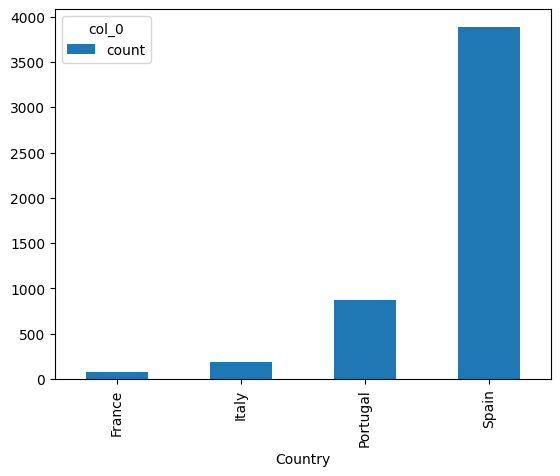

In [ ]:
country_count.plot(kind='bar') # using pandas plot method
plt.show()

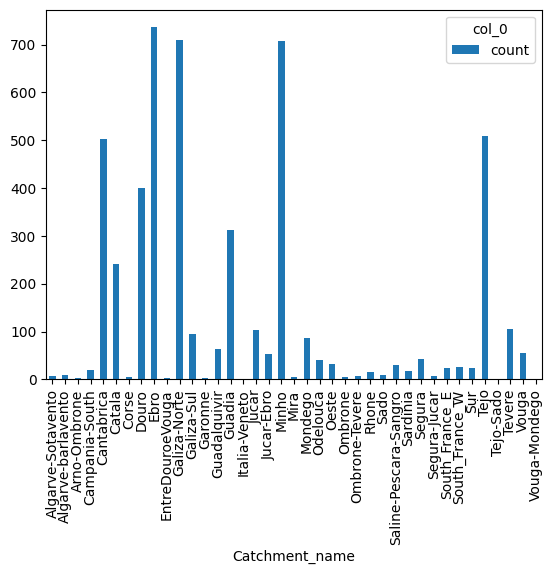

In [ ]:
catchment_count.plot(kind='bar') # using pandas plot method
plt.show()

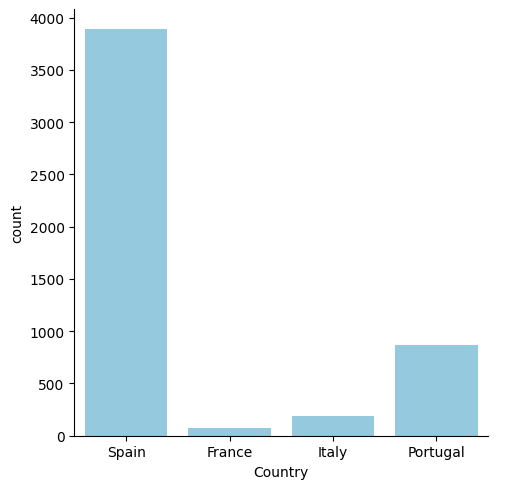

In [ ]:
# dataset with NaNs
sns.catplot(x="Country", data=df, kind="count", color="skyblue")
plt.show()

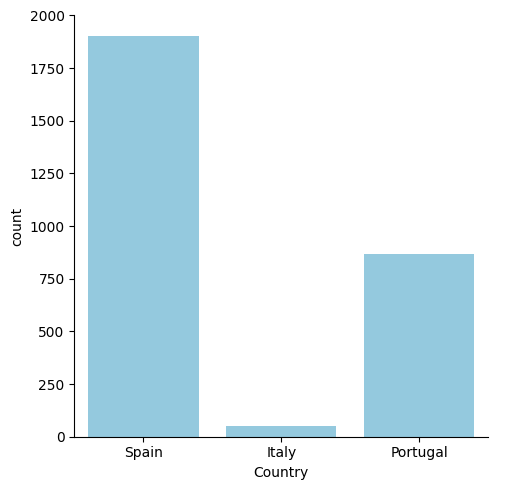

In [ ]:
# dataset without NaNs
sns.catplot(x="Country", data=df2, kind="count", color="skyblue")
plt.show()

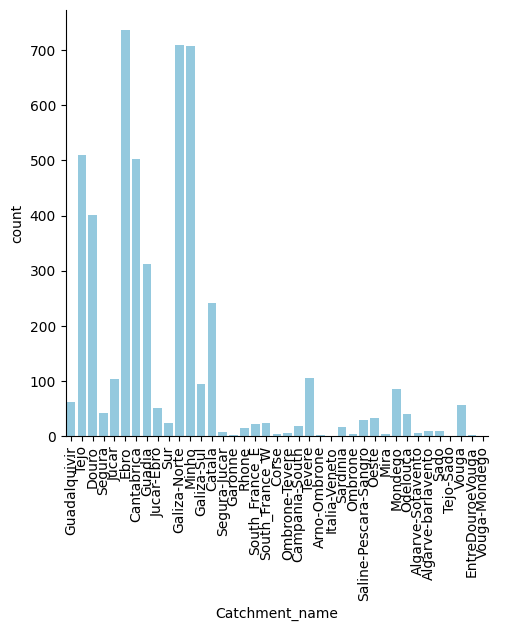

In [ ]:
# dataset with NaNs
sns.catplot(x="Catchment_name", data=df, kind="count", color="skyblue")
plt.xticks(rotation=90)
plt.show()

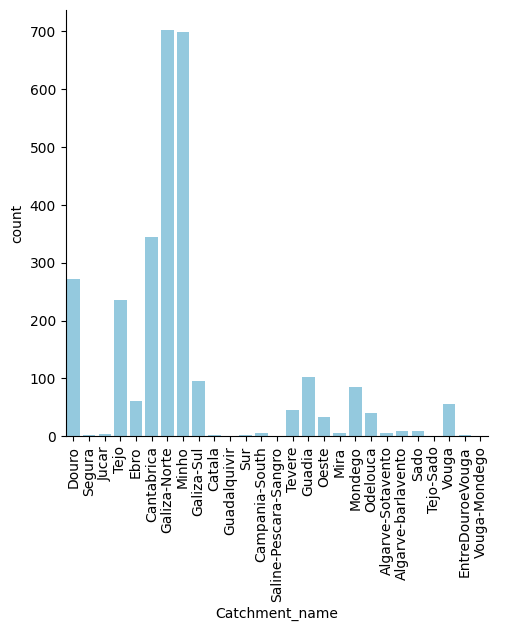

In [ ]:
# dataset without NaNs
sns.catplot(x="Catchment_name", data=df2, kind="count", color="skyblue")
plt.xticks(rotation=90)
plt.show()

##### Pie charts

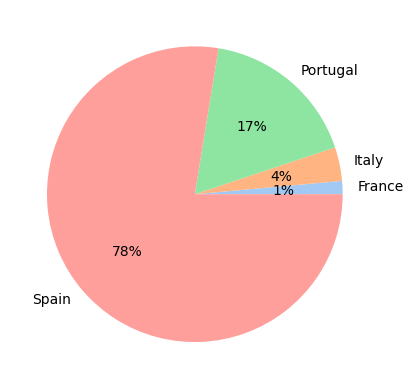

In [ ]:
# pie chart
colors = sns.color_palette('pastel')
labels = list(country_count.index) # list of country names
plt.pie(list(country_count.iloc[:,0]), labels=labels, colors = colors, autopct = '%0.0f%%')
plt.show()

##### Treemaps

To plot treemaps you'll need to install `squarify`: run `pip install squarify` in the terminal.

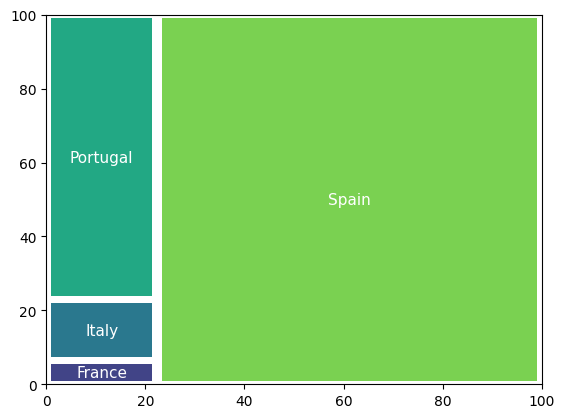

In [ ]:
import squarify as sqrf

labels = list(country_count.index) # list of country names

sqrf.plot(sizes=list(country_count.iloc[:,0]), # select all rows from the 1st column of data
          label=labels, # names of countries
          color=sns.color_palette('viridis',n_colors=len(labels)), # color palette
          text_kwargs={'fontsize': 11, 'color':"white"}, # label format
          pad=0.25) # define space between areas
plt.show()


### Plotting quantitative data

#### Strip plots
check here: https://seaborn.pydata.org/generated/seaborn.stripplot.html

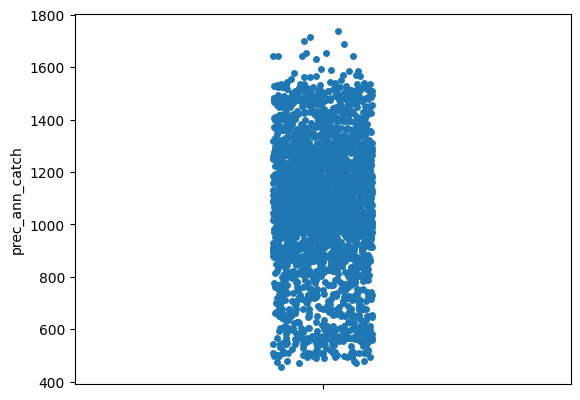

In [ ]:
# plot the mean annual total precipitation in the upstream catchment of each site
sns.stripplot(df2['prec_ann_catch'])
plt.show()


#### Histograms
check here: https://seaborn.pydata.org/generated/seaborn.histplot.html

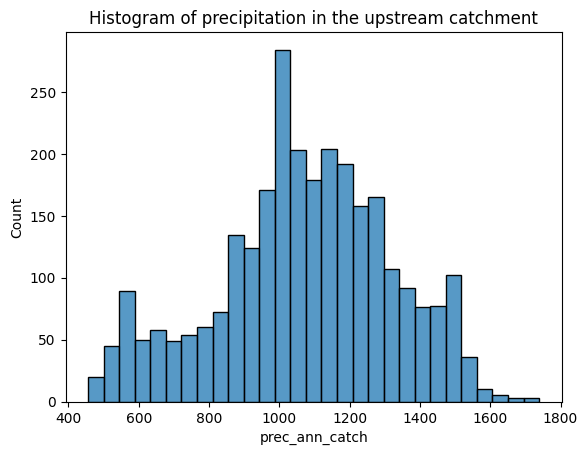

In [ ]:
# histogram of the mean annual total precipitation in the upstream catchment of each site
sns.histplot(df2['prec_ann_catch'], kde = False).set_title("Histogram of precipitation in the upstream catchment")
plt.show()

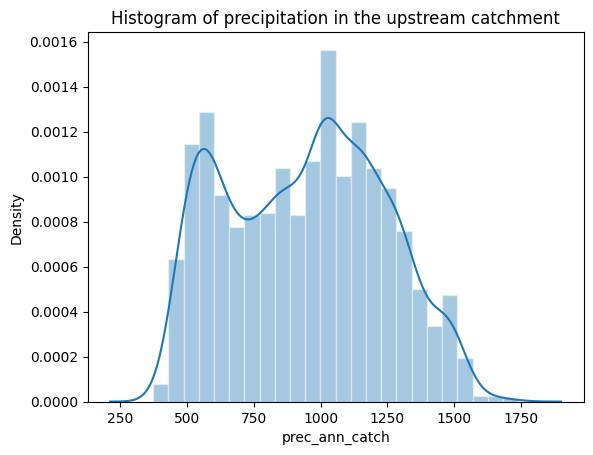

In [ ]:
# More variations
sns.histplot(
    df["prec_ann_catch"],
    kde=True,
    stat="density", # plot proportions instead of frequencies
    kde_kws=dict(cut=3),
    alpha=.4, # transparency
    edgecolor=(1, 1, 1, 0.4), # bar contour lines (r, g, b, alpha)
).set_title("Histogram of precipitation in the upstream catchment")
plt.show()

### Bar plots

Check here: https://seaborn.pydata.org/generated/seaborn.barplot.html

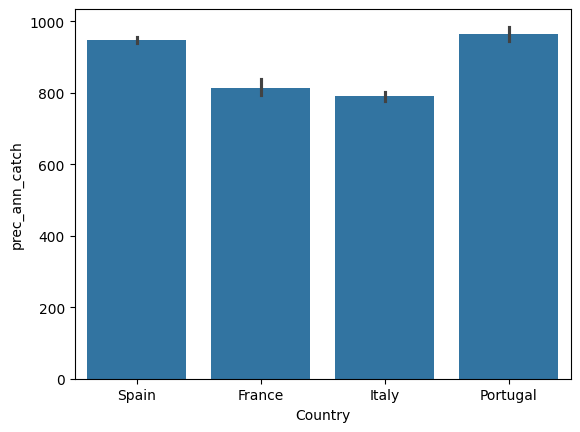

In [ ]:
# bar plot of Total Annual Precipitation by country
sns.barplot(x="Country", y="prec_ann_catch", data=df)
plt.show()

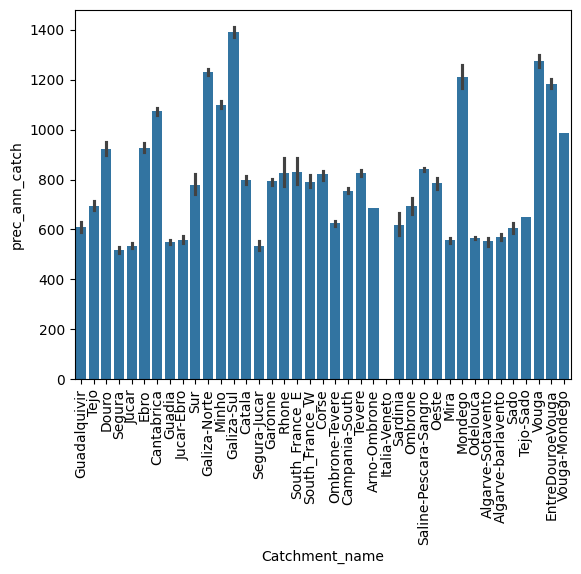

In [ ]:
# bar plot of Total Annual Precipitation by catchment
sns.barplot(data=df, x="Catchment_name", y="prec_ann_catch")
plt.xticks(rotation=90)
plt.show()

### Boxplots

Check here: https://seaborn.pydata.org/generated/seaborn.boxplot.html

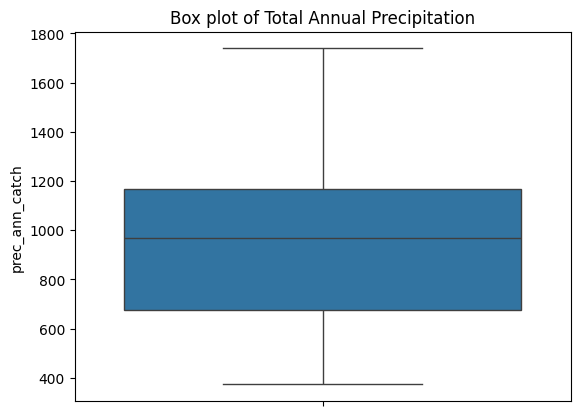

In [ ]:
# Box plot of Total Annual Precipitation
sns.boxplot(df["prec_ann_catch"]).set_title("Box plot of Total Annual Precipitation")
plt.show()

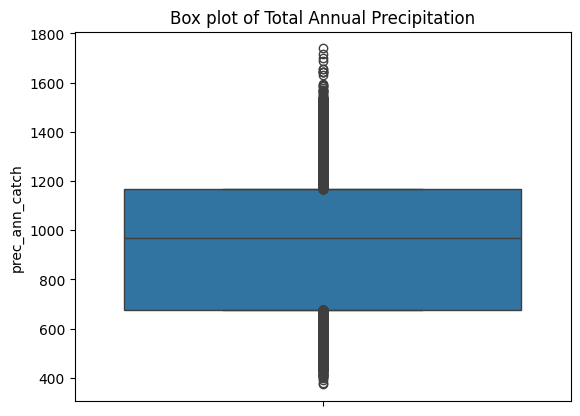

In [ ]:
# no whiskers (data points outside the box instead)
sns.boxplot(df["prec_ann_catch"], whis=0).set_title("Box plot of Total Annual Precipitation")
plt.show()

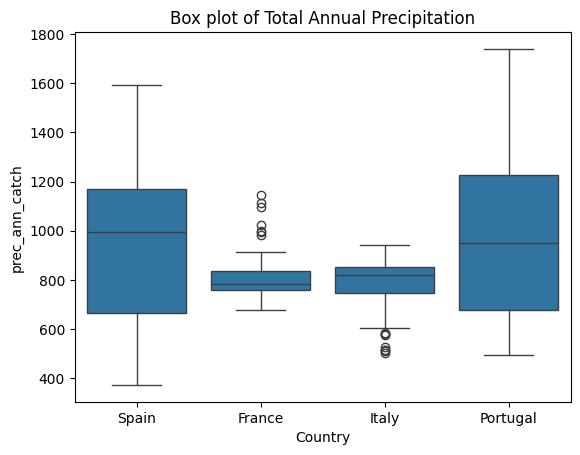

In [ ]:
# Box plot of Total Annual Precipitation by country
sns.boxplot(x="Country", y="prec_ann_catch", data=df).set_title("Box plot of Total Annual Precipitation")
plt.show()

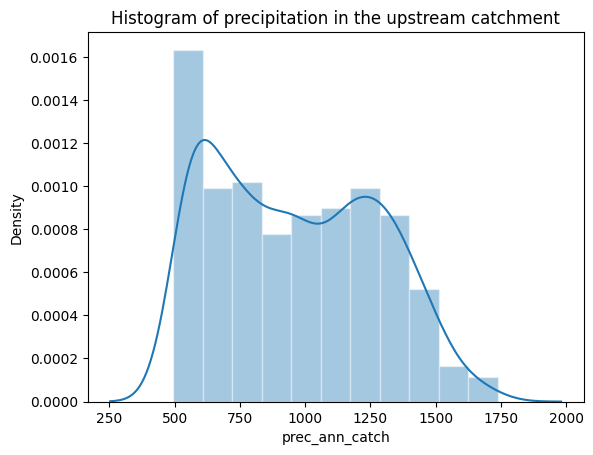

In [ ]:
# same thin but only for Portugal

df_port = df[df['Country']=='Portugal']

sns.histplot(
    df_port["prec_ann_catch"],
    kde=True,
    stat="density",
    kde_kws=dict(cut=3),
    alpha=.4,
    edgecolor=(1, 1, 1, 0.4),
).set_title("Histogram of precipitation in the upstream catchment")
plt.show()


### Violin plots

Check here: https://seaborn.pydata.org/generated/seaborn.violinplot.html

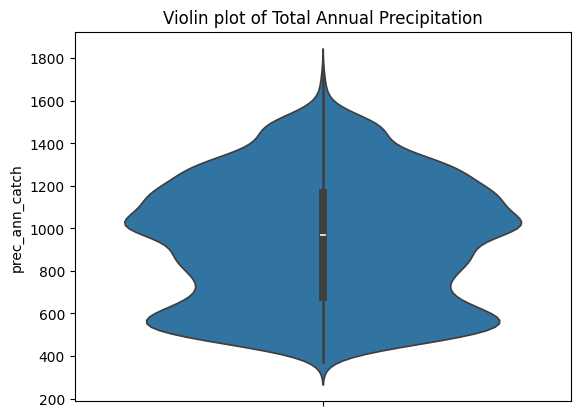

In [ ]:
# violin plot of Total Annual Precipitation by country
sns.violinplot(data=df, y="prec_ann_catch").set_title("Violin plot of Total Annual Precipitation")
plt.show()

### Raincloud plots

Raincloud plots combine violin plots, boxplots and strip plots into a single chart. To plot raincloud plots it is helpful to use the `ptitprince` library.

In [ ]:
!pip install ptitprince

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 15.1 MB/s eta 0:00:00
  Created wheel for ptitprince: filename=ptitprince-0.2.7-py3-none-any.whl size=10655 sha256=954e3ba6b35651ecc706921778d33ee5a2ac94260a8e67901eccdf2b8944f956
  Stored in directory: /root/.cache/pip/wheels/d0/5a/76/53fc6d781c06cea5c60e4c69a9ae9beca5675a7dc1206ec8bc
Successfully built ptitprince
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.2
    Uninstalling seaborn-0.13.2:
      Successfully uninstalled seaborn-0.13.2


In [ ]:
!pip uninstall ptitprince

Found existing installation: ptitprince 0.2.7
Uninstalling ptitprince-0.2.7:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/ptitprince-0.2.7.dist-info/*
    /usr/local/lib/python3.11/dist-packages/ptitprince/*
Proceed (Y/n)? Y
  Successfully uninstalled ptitprince-0.2.7


In [ ]:
import ptitprince as pt

AttributeError: module 'matplotlib.cm' has no attribute 'register_cmap'

In [ ]:
help(pt.RainCloud)

NameError: name 'pt' is not defined

In [ ]:
# Raincloud plot of Total Annual Precipitation

pt.RainCloud(y="prec_ann_catch", data=df,
             bw=0.2, # defines how smooth is the distribution curve of the violin plot (cloud)
             width_viol=0.4, # width of the half violin (cloud)
             width_box=0.05, # wdth of the box
             orient='h', # orientation
             move=0.15, #position of the strip plot
             offset=0,# relative position of the half violin (cloud) in relation to the boxplot
             jitter=0.09) # allows to define the width of the strip plot (rain)

plt.title("Raincloud plot of Total Annual Precipitation")
plt.show()

In [ ]:
# Raincloud plot of Total Annual Precipitation by country

pt.RainCloud(x='Country', y="prec_ann_catch", data=df,
             bw=0.2, # defines how smooth is the distribution curve of the violin plot (cloud)
             width_viol=1.2, # width of the half violin (cloud)
             width_box=0.15, # wdth of the box
             orient='h', # orientation
             move=0.15, #position of the strip plot
             offset=0,# relative position of the half violin (cloud) in relation to the boxplot
             jitter=0.09) # allows to define the width of the strip plot (rain)

plt.title("Raincloud plot of Total Annual Precipitation")
plt.show()

In [ ]:
# Vertical raincloud plot of Total Annual Precipitation by country

pt.RainCloud(x='Country', y="prec_ann_catch", data=df,
             bw=0.2, # defines how smooth is the distribution curve of the violin plot (cloud)
             width_viol=1.2, # width of the half violin (cloud)
             width_box=0.08, # wdth of the box
             move=0.15, #position of the strip plot
             offset=0,# relative position of the half violin (cloud) in relation to the boxplot
             jitter=0.08) # allows to define the width of the strip plot (rain)

plt.title("Raincloud plot of Total Annual Precipitation")
plt.show()

Temperature exercises

Plot strip plots, histograms
and boxplots (and any additional plot that you feel appropriate) of Annual Mean Temperature
(temp_ann) at each of the four catchments with the highest number of fish sampling sites.

Firstly determine the four catchments with the highest number of fish sampling sites

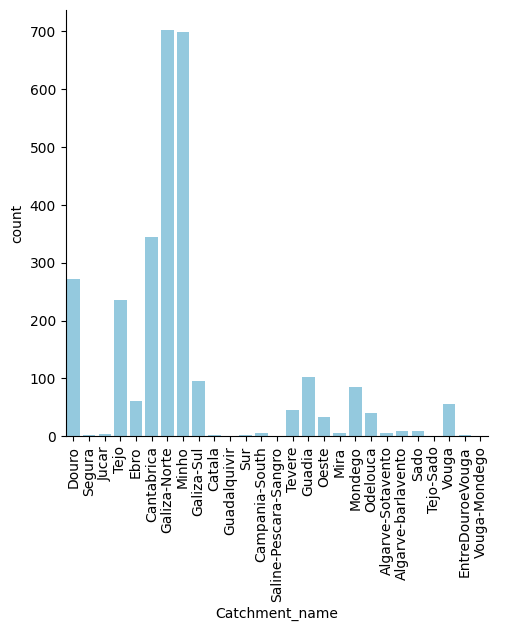

In [ ]:
# dataset without NaNs

sns.catplot(x="Catchment_name", data=df2, kind="count", color="skyblue")
plt.xticks(rotation=90)
plt.show()

In [22]:
catchment_count = pd.crosstab(index = df['Catchment_name'], columns='count')
print(catchment_count.sort_values('count', ascending=False))

col_0                  count
Catchment_name              
Ebro                     736
Galiza-Norte             709
Minho                    707
Tejo                     509
Cantabrica               502
Douro                    401
Guadia                   313
Catala                   242
Tevere                   106
Jucar                    103
Galiza-Sul                95
Mondego                   86
Guadalquivir              63
Vouga                     56
Jucar-Ebro                52
Segura                    42
Odelouca                  40
Oeste                     33
Saline-Pescara-Sangro     29
South_France_W            25
Sur                       24
South_France_E            23
Campania-South            19
Sardinia                  17
Rhone                     16
Algarve-barlavento        10
Sado                       9
Segura-Jucar               7
Ombrone-Tevere             6
Algarve-Sotavento          6
Mira                       5
Ombrone                    5
Corse         

In [ ]:
# Get the four catchments with the highest count
top_four_catchments = catchment_count.nlargest(4, 'count').index.tolist()
top_four_catchments

['Ebro', 'Galiza-Norte', 'Minho', 'Tejo']

Now we know, from graphing, listing, and using a pandas method, that the four catchments with the highest number of fish sampling sites are Ebro, Galiza-Norte, Minho, and Tejo.
The next step is to create strip plots of temp_ann (annual mean temperature) for these four catchments

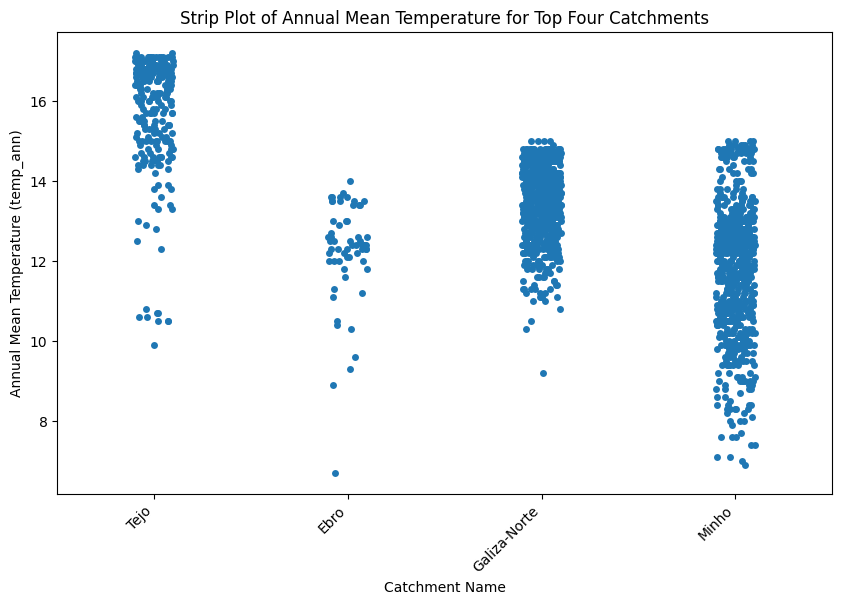

In [99]:
# Filter the DataFrame to include only the top four catchments
top_four_df = df2[df2['Catchment_name'].isin(top_four_catchments)]

# Create the stripplot for temp_ann for the top four catchments
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
sns.stripplot(x='Catchment_name', y='temp_ann', data=top_four_df)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title('Strip Plot of Annual Mean Temperature for Top Four Catchments')
plt.xlabel('Catchment Name')
plt.ylabel('Annual Mean Temperature (temp_ann)')
plt.show()


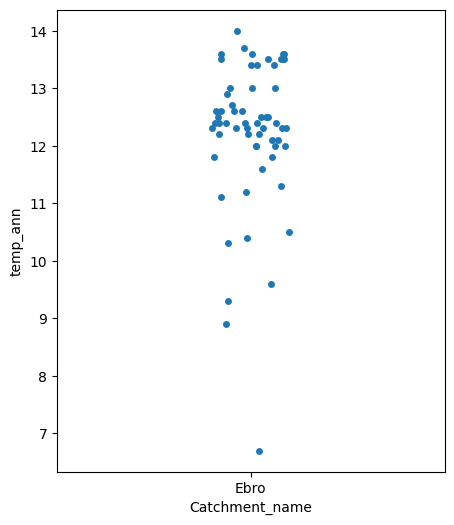

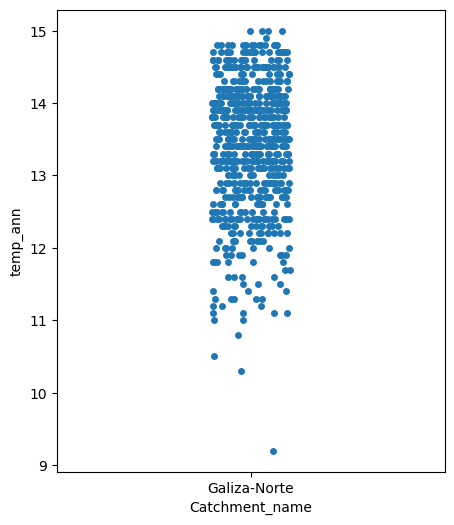

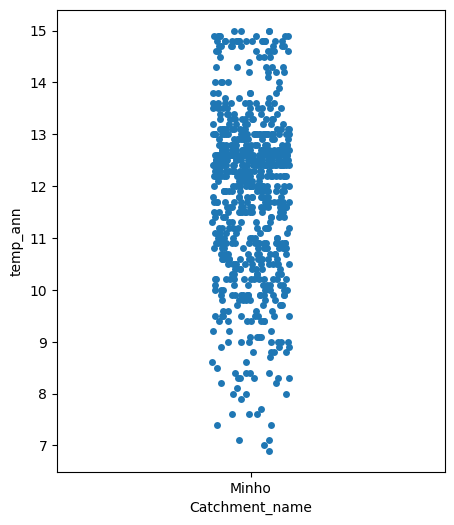

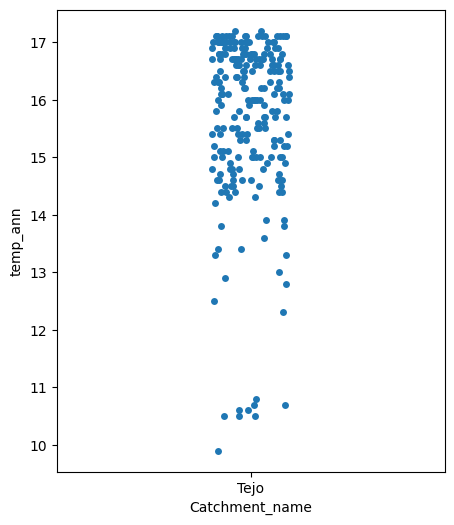

In [80]:

for catchment in top_four_catchments: # loop through each catchment
  plt.figure(figsize=(5, 6))
  catchment_df = top_four_df[top_four_df['Catchment_name'] == catchment] # create a df for current catchment
  sns.stripplot(x='Catchment_name', y='temp_ann', data=catchment_df)
  plt.show()

Visualising them side by side is interesting to see the differences between the temperatures at each site. I think this is a useful way to display this data, though the way the x-axis doesn't present variable information will be confusing to many viewers who haven't seen a strip plot before.

Now we move onto histograms

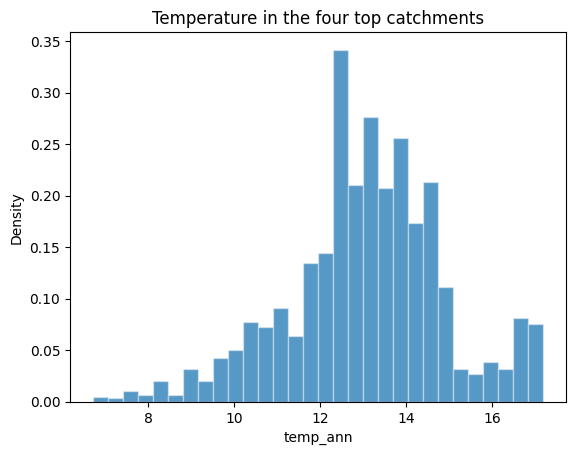

In [72]:
sns.histplot(
    top_four_df["temp_ann"],
    stat="density", # plot proportions instead of frequencies
    edgecolor=(1, 1, 1, 0.4), # bar contour lines
    # hue="Catchment_name",
).set_title("Temperature in the four top catchments")
plt.show()

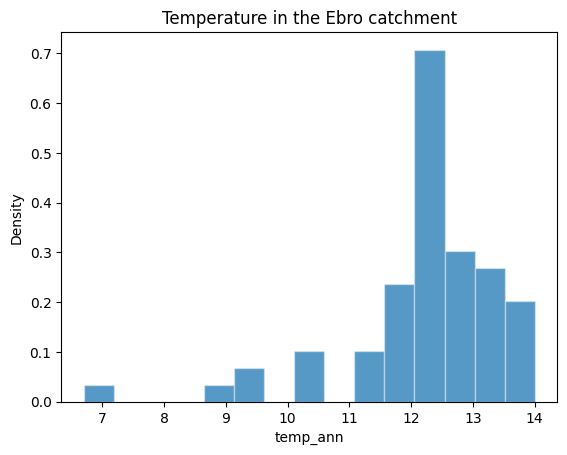

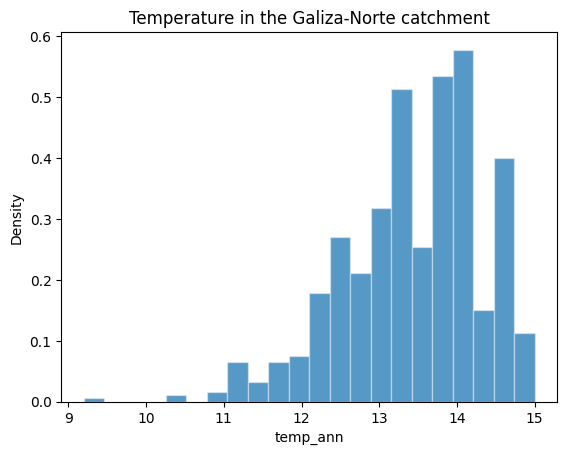

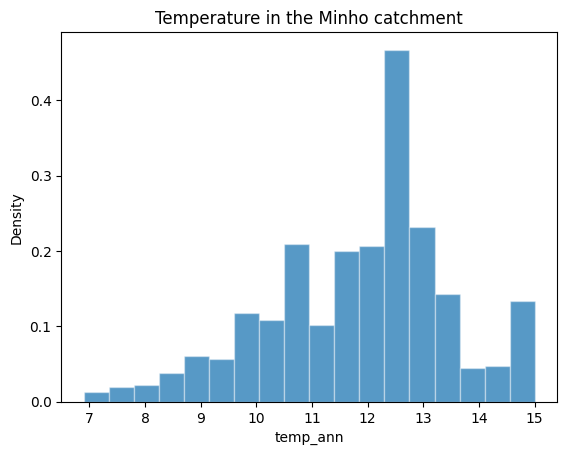

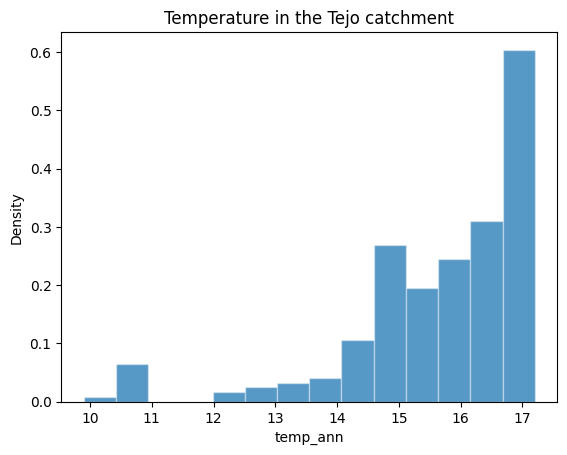

In [78]:
for catchment in top_four_catchments: # loop through each catchment
  catchment_df = top_four_df[top_four_df['Catchment_name'] == catchment] # create a df for current catchment
  sns.histplot(
      catchment_df["temp_ann"],
      stat="density", # plot proportions instead of frequencies
      edgecolor=(1, 1, 1, 0.4), # bar contour lines
  ).set_title(f"Temperature in the {catchment} catchment")
  plt.show()

The histograms are good for viewing categorical data, which this dataset has made temperature, though we know temperature as a continous, rather than categorical variable. They are also good for showing trends over time, however we have not connected these annual temperatures to a timeline, so this visualisation is not useful for this.

Now onto the boxplots:

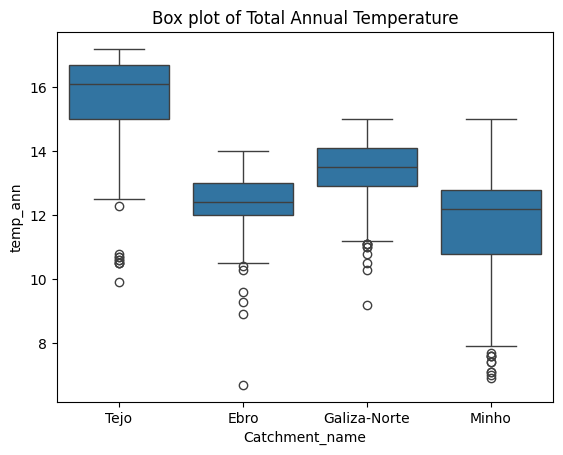

In [58]:
sns.boxplot(x="Catchment_name", y="temp_ann", data=top_four_df).set_title("Box plot of Total Annual Temperature")
plt.show()

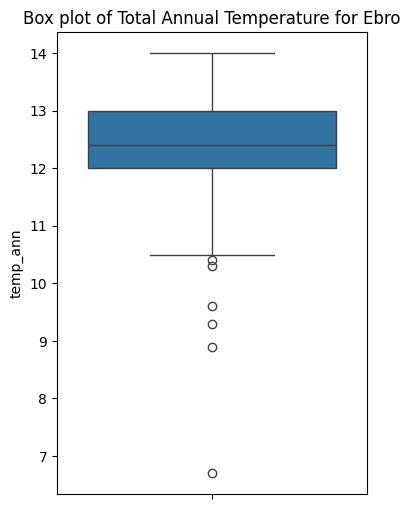

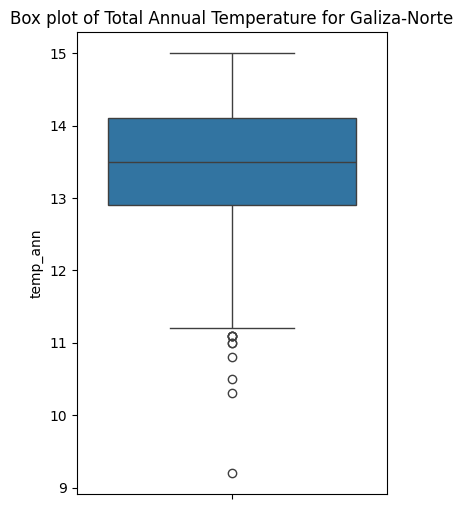

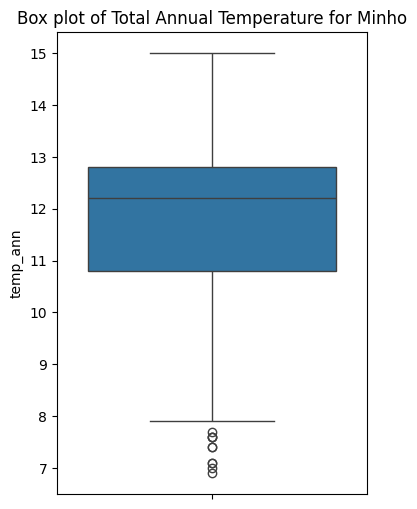

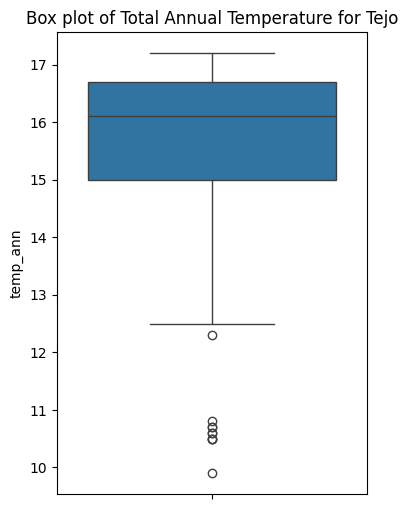

In [82]:
for catchment in top_four_catchments: # loop through each catchment
  plt.figure(figsize=(4, 6)) #reduce the size of the graphs
  catchment_df = top_four_df[top_four_df['Catchment_name'] == catchment] # create a df for current catchment
  sns.boxplot(y="temp_ann", data=catchment_df).set_title(f"Box plot of Total Annual Temperature for {catchment}")
  plt.show()

Both of these sets of box plot graphs show a large amount of information and they are useful side by side and in their own graphs, as they are useful to use to compare the temperature values, such as what the median annual temperature value per site, as well as the variations at each site. It is also useful to identify outliers for both further data cleaning and to see unusual years. It would be useful if this data set had the years of each datapoint so that these outliers could be checked with the weather records of those years.

Finally we move onto constructing a plot that shows how the mean value of temp_ann varies with the size of random samplings at all sites. note: the instructions were unclear as to whether this random sampling should be at only the top four sites, or all sites, so I have used all sites.

In [100]:
# randomly sample 10 temp_ann values from df2
df_sample_10 = df2.sample(10, replace=True)
df_sample_10["temp_ann"].mean()

12.9

In [111]:
# the population mean is 13.43
sample_sizes = [10, 50, 100, 150, 200, 250, 300, 500, 1000, 2000]
sampled = []
for sample in sample_sizes:
  df_sample = df2.sample(sample, replace=True)
  sampled.append(df_sample["temp_ann"].mean().round(2))
sampled

[14.14, 13.69, 13.33, 13.45, 13.59, 13.37, 13.5, 13.37, 13.36, 13.47]

Create a line chart with line for sampled data and line for 13.43

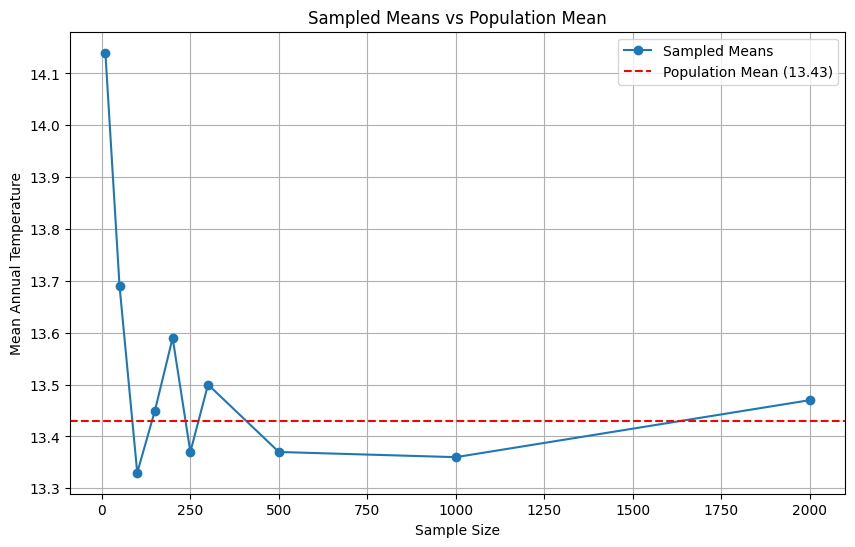

In [112]:
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, sampled, marker='o', linestyle='-', label='Sampled Means')
plt.axhline(y=13.43, color='r', linestyle='--', label='Population Mean (13.43)')
plt.xlabel('Sample Size')
plt.ylabel('Mean Annual Temperature')
plt.title('Sampled Means vs Population Mean')
plt.legend()
plt.grid(True)
plt.show()


It appears that the sample mean starts to stabilise to the population mean at around 300 samples, however is slightly different each time the code above is run. Running it five times gives a better indication.

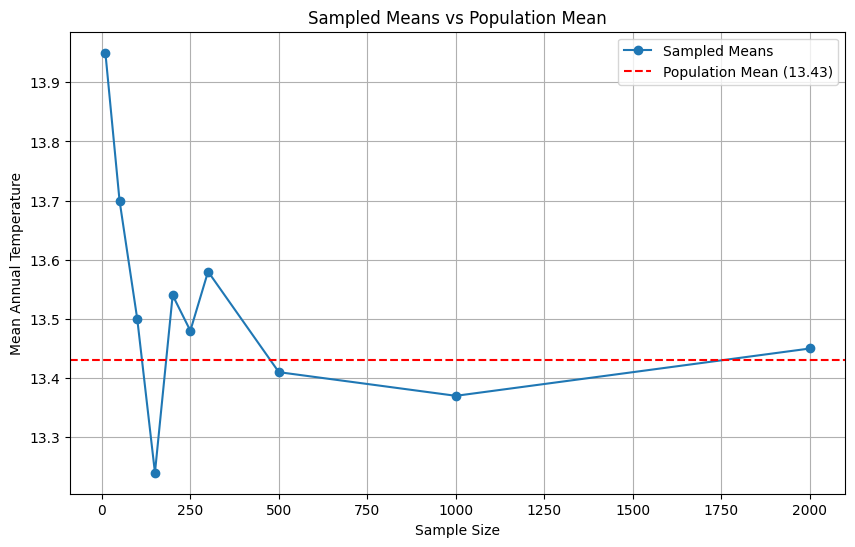

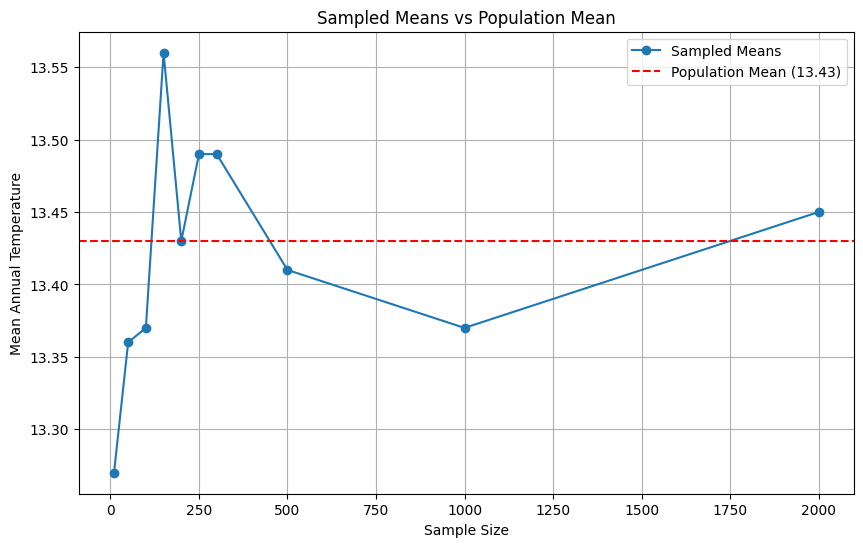

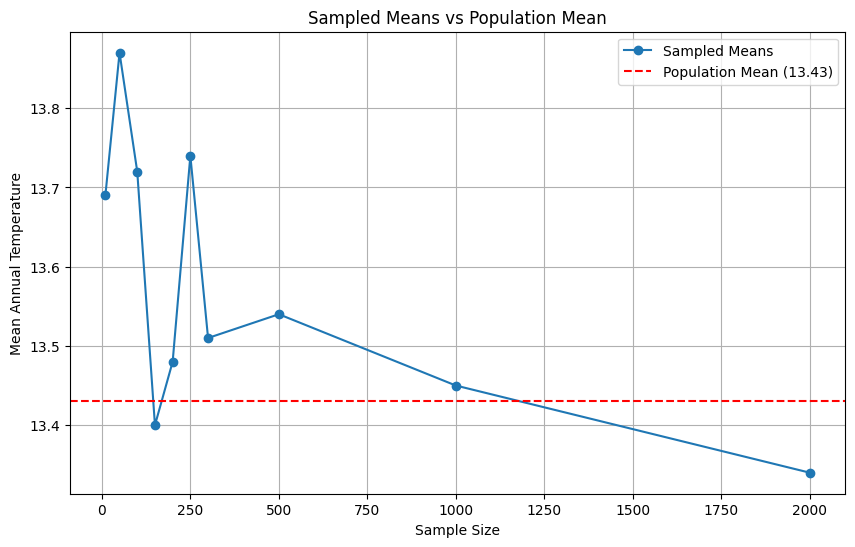

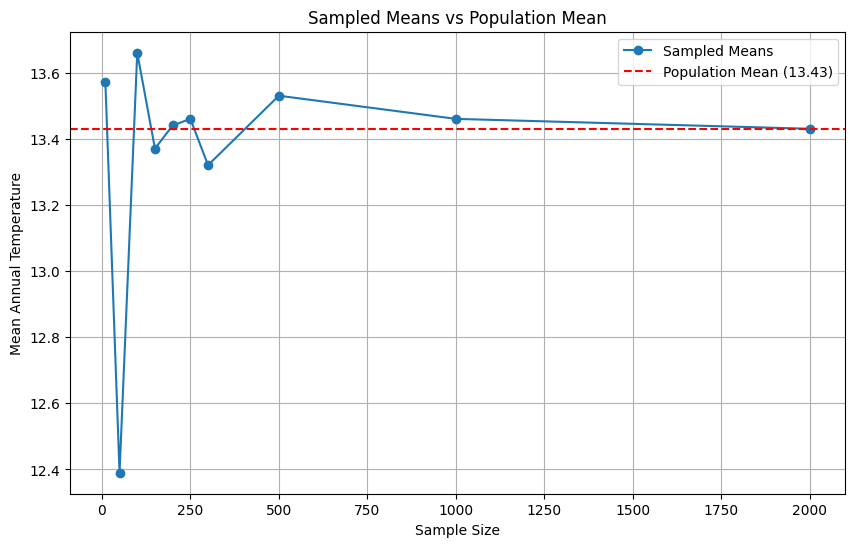

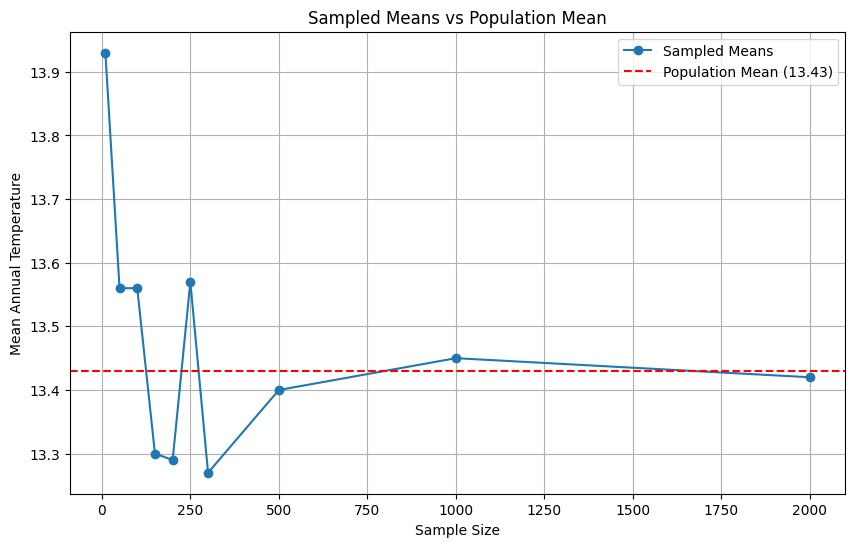

In [113]:
for i in range(5):
  sampled = []
  for sample in sample_sizes:
    df_sample = df2.sample(sample, replace=True)
    sampled.append(df_sample["temp_ann"].mean().round(2))
  sampled
  plt.figure(figsize=(10, 6))
  plt.plot(sample_sizes, sampled, marker='o', linestyle='-', label='Sampled Means')
  plt.axhline(y=13.43, color='r', linestyle='--', label='Population Mean (13.43)')
  plt.xlabel('Sample Size')
  plt.ylabel('Mean Annual Temperature')
  plt.title('Sampled Means vs Population Mean')
  plt.legend()
  plt.grid(True)
  plt.show()

Now we see that it is quite variable and perhaps more samples are needed, though the line generally starts to plateau around 500, and is almost flat between 1000 and 2000